# S&P 500 ESG Risk Load and Scatter


In [19]:
from math import log10
import pandas as pd
df1 = pd.read_csv('/Users/danielharrod/git/S&P 500 ESG Risk Ratings /SP 500 ESG Risk Ratings.csv', thousands=',')
df1['log_employees'] = df1['Full Time Employees'].apply(log10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 501 non-null    object 
 3   Sector                  501 non-null    object 
 4   Industry                501 non-null    object 
 5   Full Time Employees     496 non-null    float64
 6   Description             501 non-null    object 
 7   Total ESG Risk score    433 non-null    float64
 8   Environment Risk Score  433 non-null    float64
 9   Governance Risk Score   433 non-null    float64
 10  Social Risk Score       433 non-null    float64
 11  Controversy Level       404 non-null    object 
 12  Controversy Score       433 non-null    float64
 13  ESG Risk Percentile     433 non-null    object 
 14  ESG Risk Level          376 non-null    ob

In [20]:
df1.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level,log_employees
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,18000.0,"Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low,4.255273
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,132500.0,"American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN,5.122216
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,40000.0,"Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible,4.602060
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,164000.0,"Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low,5.214844
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium,4.698970


In [35]:
# Here is a simple cell to drop all rows with missing values
df1_cleaned = df1.dropna(subset=['Total ESG Risk score', 'Controversy Score', 'ESG Risk Level', 'Symbol', 'Sector'])

In [33]:
from plotly.express import scatter
scatter(data_frame=df1_cleaned, x='Total ESG Risk score', y='Controversy Score', color='ESG Risk Level', hover_name='Symbol').show()

In [34]:
scatter(data_frame=df1_cleaned, x='Total ESG Risk score', y='Controversy Score', color='Sector', hover_name='Symbol').show()

In [29]:
scatter(data_frame=df1, y='Total ESG Risk score', x='Full Time Employees', color='Controversy Score',  hover_name='Symbol', log_x=True).show()

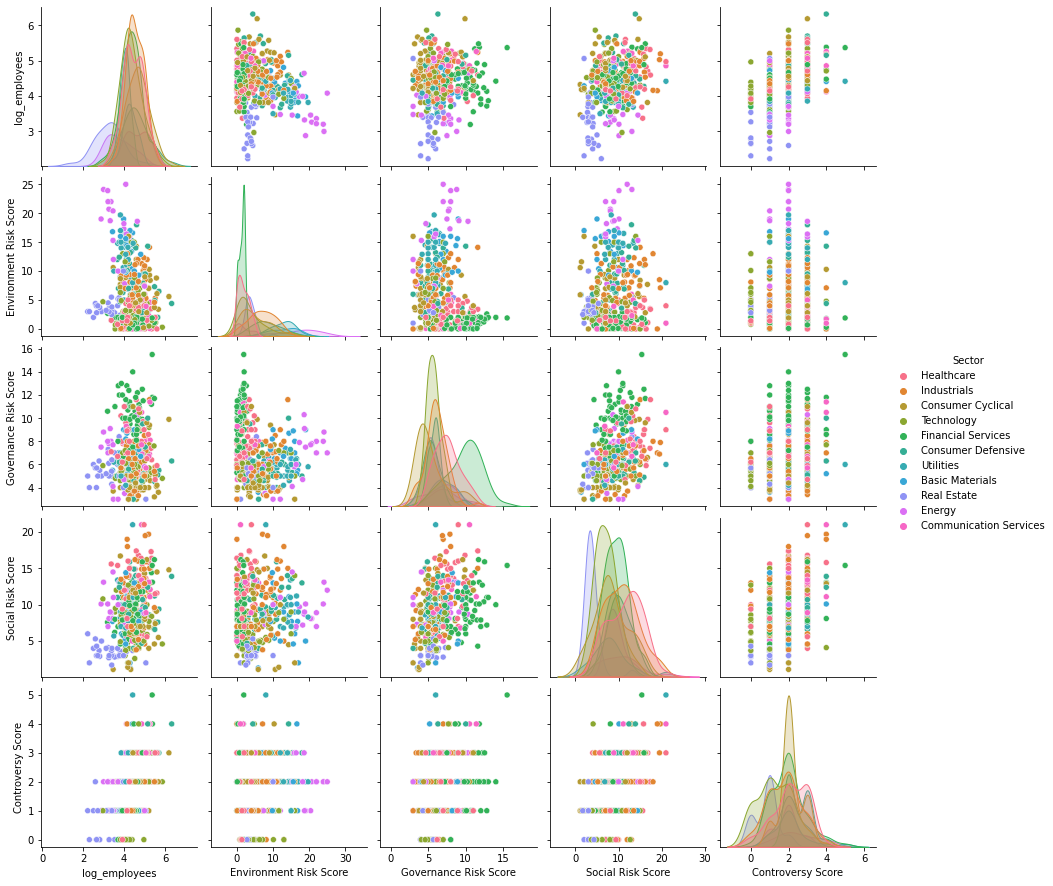

In [25]:
from seaborn import pairplot
columns = ['Sector', 'log_employees'] + [item for item in df1.columns if 'Score' in item]
pairplot(data=df1[columns], hue='Sector')